## Scaling for the 1D model


In [1]:
import cmocean as cmo
import numpy as np  
import matplotlib.gridspec as gspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
import scipy.stats

%matplotlib inline

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [3]:
# Plots appearance
sns.set_context('talk')
sns.set_style('whitegrid')

In [4]:
def timesteppingKv(IC, KK, dt, dz, maxt):
    '''Iterate for nt timesteps the solution to the diffusion equation with variable Kv
    INPUT
    
    OUTPUT
    u: 1d numpy array with concentrations after nt timesteps.
    '''
    rhok = np.copy(IC)  
    for t in np.arange(dt, maxt, dt):
        newrho = rhok[1:-1] + dt/dz**2 * (KK[0:-1] * rhok[0:-2] - 
                                         (KK[0:-1]+KK[1:])*rhok[1:-1] + 
                                             KK[1:]*rhok[2:])
        rhok[1:-1] = newrho
    return(rhok)

def smoothHS(hdepth, epsilon, Hr, kbg, kcan):
    '''Build smooth Heaviside function at mid-depth points hdepth ''' 
    
    KK = kbg + kcan*(0.5 + 
                     0.5*(hdepth-Hr)/epsilon + 
                     1./(2*np.pi)*np.sin(np.pi*(hdepth-Hr)/(epsilon)))
    KK[hdepth < Hr - epsilon] = kbg
    KK[hdepth >= Hr + epsilon] = kbg + kcan
    return KK

def initialize(npts, tot_depth, Hr, No=0.5e-2):
    '''
    INPUT
         npts:: int, total number of grid points
    tot_depth:: float, total depth
           Hr:: float, rim depth
           No:: float, inital stratification
    OUTPUT
          dz :: float z spacing
       depth :: array, depths
      hdepth :: array, depths at half grid points 
         rho :: array, initial conditions
    '''
    dz = td/npts
    N = No*np.ones(npts)
    depth = np.arange(0, tot_depth, dz)
    hdepth = depth[:-1]+dz/2.

    rho = 1010 + N**2*1000/10.*depth
    return(dz, depth, hdepth, rho)

In [5]:
# INITIALIZATION For all runs

sbd = 150.
Hr = 110. # m
td = 2*sbd # total depth

# Diffusivity
kbg = 1E-5              # background diffusivity

**3 experiments**: tau, epsilon, kcan

Results in arrays C_tau, C_eps, C_kcan

Base case has tau=6 days, epsilon=10 m, kcan = 10$^{-3}$ m$^2$s$^{-1}$.

In [37]:
print('Kcan \t CFL')
for kk in kcans:
    cfl = kk*1/dz**2
    print(kk,cfl)

for kk in [1E-2,1.2E-2,1.5E-2]:
    cfl = kk*1/dz**2
    print(kk,cfl)

Kcan 	 CFL
0.0001 0.0016
0.0005 0.008
0.001 0.016
0.005 0.08
0.008 0.128
0.01 0.16
0.012 0.192
0.01 0.16
0.012 0.192
0.015 0.24


In [6]:
# Tau runs

npts = 1200
eps = 10 
kcan = 1E-3
times = [1,2,4,6,8,10,12,14,16]

C_tau = np.zeros((len(times), npts))
dCmin_tau = np.zeros(len(times))
dCmax_tau = np.zeros(len(times))
Zdif_tau = np.zeros(len(times))
Zs_tau = np.zeros(len(times))

ii = 0

for time in times:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_tau[ii,:] = conc
    dCmin_tau[ii] = np.min(dCdz/dCo)
    dCmax_tau[ii] = np.max(dCdz/dCo)
    Zdif_tau[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_tau[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
        
    ii = ii + 1
    

In [7]:
# Tau 2 runs

npts = 1200
eps = 10 
kcan = 1E-2
times = [1,2,4,6,8,10,12,14,16]

C_tau2 = np.zeros((len(times), npts))
dCmin_tau2 = np.zeros(len(times))
dCmax_tau2 = np.zeros(len(times))
Zdif_tau2 = np.zeros(len(times))
Zs_tau2 = np.zeros(len(times))

ii = 0

for time in times:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_tau2[ii,:] = conc
    dCmin_tau2[ii] = np.min(dCdz/dCo)
    dCmax_tau2[ii] = np.max(dCdz/dCo)
    Zdif_tau2[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_tau2[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
        
    ii = ii + 1

In [8]:
# Tau 3, 4 runs

npts = 1200
eps = 30 
kcan = 1E-3
times = [1,2,4,6,8,10,12,14,16]

C_tau3 = np.zeros((len(times), npts))
dCmin_tau3 = np.zeros(len(times))
dCmax_tau3 = np.zeros(len(times))
Zdif_tau3 = np.zeros(len(times))
Zs_tau3 = np.zeros(len(times))

ii = 0

for time in times:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_tau3[ii,:] = conc
    dCmin_tau3[ii] = np.min(dCdz/dCo)
    dCmax_tau3[ii] = np.max(dCdz/dCo)
    Zdif_tau3[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_tau3[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
        
    ii = ii + 1
  
eps = 5 
C_tau4 = np.zeros((len(times), npts))
dCmin_tau4 = np.zeros(len(times))
dCmax_tau4 = np.zeros(len(times))
Zdif_tau4 = np.zeros(len(times))
Zs_tau4 = np.zeros(len(times))

ii = 0

for time in times:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_tau4[ii,:] = conc
    dCmin_tau4[ii] = np.min(dCdz/dCo)
    dCmax_tau4[ii] = np.max(dCdz/dCo)
    Zdif_tau4[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_tau4[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
        
    ii = ii + 1

In [9]:
# Kv runs

npts = 1200
eps = 10 
kcans = [1E-4, 5E-4, 1E-3, 5E-3, 8E-3, 1E-2, 1.2E-2]
time = 6

C_kcan = np.zeros((len(kcans), npts))
dCmin_kcan = np.zeros(len(kcans))
dCmax_kcan = np.zeros(len(kcans))
Zdif_kcan = np.zeros(len(kcans))
Zs_kcan = np.zeros(len(kcans))

ii = 0
for kcan in kcans:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_kcan[ii,:] = conc
    
    dCmin_kcan[ii] = np.min(dCdz/dCo)
    dCmax_kcan[ii] = np.max(dCdz/dCo)
    Zdif_kcan[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_kcan[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
 
    ii = ii + 1

In [10]:
# Kv 2 runs

npts = 1200
eps = 30 
kcans = [1E-4, 5E-4, 1E-3, 5E-3, 8E-3, 1E-2, 1.2E-2]
time = 6

C_kcan2 = np.zeros((len(kcans), npts))
dCmin_kcan2 = np.zeros(len(kcans))
dCmax_kcan2 = np.zeros(len(kcans))
Zdif_kcan2 = np.zeros(len(kcans))
Zs_kcan2 = np.zeros(len(kcans))

ii = 0
for kcan in kcans:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_kcan2[ii,:] = conc
    
    dCmin_kcan2[ii] = np.min(dCdz/dCo)
    dCmax_kcan2[ii] = np.max(dCdz/dCo)
    Zdif_kcan2[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_kcan2[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
 
    ii = ii + 1

In [11]:
# Kv 3, 4 runs

npts = 1200
eps = 10 
kcans = [1E-4, 5E-4, 1E-3, 5E-3, 8E-3, 1E-2, 1.2E-2]
time = 9

C_kcan3 = np.zeros((len(kcans), npts))
dCmin_kcan3 = np.zeros(len(kcans))
dCmax_kcan3 = np.zeros(len(kcans))
Zdif_kcan3 = np.zeros(len(kcans))
Zs_kcan3 = np.zeros(len(kcans))

ii = 0
for kcan in kcans:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_kcan3[ii,:] = conc
    dCmin_kcan3[ii] = np.min(dCdz/dCo)
    dCmax_kcan3[ii] = np.max(dCdz/dCo)
    Zdif_kcan3[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_kcan3[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
 
    ii = ii + 1
    
eps = 5
time = 6
C_kcan4 = np.zeros((len(kcans), npts))
dCmin_kcan4 = np.zeros(len(kcans))
dCmax_kcan4 = np.zeros(len(kcans))
Zdif_kcan4 = np.zeros(len(kcans))
Zs_kcan4 = np.zeros(len(kcans))

ii = 0
for kcan in kcans:
    dt, maxt = 1, 86400*time/1
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_kcan4[ii,:] = conc
    dCmin_kcan4[ii] = np.min(dCdz/dCo)
    dCmax_kcan4[ii] = np.max(dCdz/dCo)
    Zdif_kcan4[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_kcan4[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
 
    ii = ii + 1

In [12]:
# epsilon runs

npts = 1200
epsilons = [1,5,10,20,30,40,50,60] 
kcan = 1E-3
time = 6

C_eps = np.zeros((len(epsilons), npts))
dCmin_eps = np.zeros(len(epsilons))
dCmax_eps = np.zeros(len(epsilons))
Zdif_eps = np.zeros(len(epsilons))
Zs_eps = np.zeros(len(epsilons))

ii = 0

for eps in epsilons:
    dt, maxt = 1, 86400*time/1                 
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_eps[ii,:] = conc
    dCmin_eps[ii] = np.min(dCdz/dCo)
    dCmax_eps[ii] = np.max(dCdz/dCo)
    Zdif_eps[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_eps[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
  
    ii = ii + 1

In [13]:
# epsilon runs 2

npts = 1200
epsilons = [1,5,10,20,30,40,50,60] 
kcan = 1E-2
time = 6

C_eps2 = np.zeros((len(epsilons), npts))
dCmin_eps2 = np.zeros(len(epsilons))
dCmax_eps2 = np.zeros(len(epsilons))
Zdif_eps2 = np.zeros(len(epsilons))
Zs_eps2 = np.zeros(len(epsilons))

ii = 0

for eps in epsilons:
    dt, maxt = 1, 86400*time/1                 
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_eps2[ii,:] = conc
    dCmin_eps2[ii] = np.min(dCdz/dCo)
    dCmax_eps2[ii] = np.max(dCdz/dCo)
    Zdif_eps2[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_eps2[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
  
    ii = ii + 1

In [14]:
# epsilon runs 3, 4

npts = 1200
epsilons = [1,5,10,20,30,40,50,60] 
kcan = 1E-2
time = 9

C_eps3 = np.zeros((len(epsilons), npts))
dCmin_eps3 = np.zeros(len(epsilons))
dCmax_eps3 = np.zeros(len(epsilons))
Zdif_eps3 = np.zeros(len(epsilons))
Zs_eps3 = np.zeros(len(epsilons))

ii = 0

for eps in epsilons:
    dt, maxt = 1, 86400*time/1                 
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_eps3[ii,:] = conc
    dCmin_eps3[ii] = np.min(dCdz/dCo)
    dCmax_eps3[ii] = np.max(dCdz/dCo)
    Zdif_eps3[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_eps3[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
  
    ii = ii + 1
    
kcan = 5E-3
time = 6
C_eps4 = np.zeros((len(epsilons), npts))
dCmin_eps4 = np.zeros(len(epsilons))
dCmax_eps4 = np.zeros(len(epsilons))
Zdif_eps4 = np.zeros(len(epsilons))
Zs_eps4 = np.zeros(len(epsilons))

ii = 0

for eps in epsilons:
    dt, maxt = 1, 86400*time/1                 
    dz, depth, hdepth, rho = initialize(npts, td, Hr, No=0.5e-2)
    KK = smoothHS(hdepth, eps, Hr, kbg, kcan)
    conc = timesteppingKv(rho, KK, dt, dz, maxt)
    dCo = np.mean((rho[1:]-rho[:-1])/dz)
    dCdz = (conc[1:]-conc[:-1])/dz
    C_eps4[ii,:] = conc
    dCmin_eps4[ii] = np.min(dCdz/dCo)
    dCmax_eps4[ii] = np.max(dCdz/dCo)
    Zdif_eps4[ii] = ((KK[int(Hr/dz)+5]-KK[int(Hr/dz)-5])*time*3600*24)**0.5
    Zs_eps4[ii] = ((KK[int(Hr/dz)-5])*time*3600*24)**0.5
  
    ii = ii + 1

### Concentration

Text(0.5,1,'$\\tau=6$ days, $K_{can}=10^{-3}$ m$^2$s$^{-1}$')

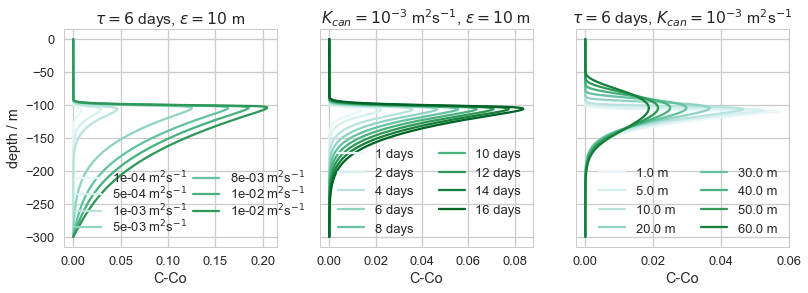

In [24]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(13,4), sharey=True)

sns.set_palette('BuGn', len(times))

for jj, kk in zip(range(len(kcans)), kcans):
    ax0.plot(C_kcan[jj,:]-rho, -depth, label=(r'%1.0e m$^2$s$^{-1}$' %kk))
ax0.legend(loc=3, ncol=2, labelspacing=0, columnspacing=0.5 )
ax0.set_xlabel('C-Co')
ax0.set_ylabel('depth / m')
ax0.set_title(r'$\tau=6$ days, $\epsilon=10$ m')

for jj, tt in zip(range(len(times)), times):
    ax1.plot(C_tau[jj,:]-rho, -depth, label=('%d days' %tt))
ax1.legend(loc=0, ncol=2)
ax1.set_xlabel('C-Co')
ax1.set_title(r'$K_{can}=10^{-3}$ m$^2$s$^{-1}$, $\epsilon=10$ m')

for jj, kk in zip(range(len(epsilons)), epsilons):
    ax2.plot(C_eps[jj,:]-rho, -depth, label=('%1.1f m' %kk))
ax2.legend(loc=0, ncol=2)
ax2.set_xlabel('C-Co')
ax2.set_title(r'$\tau=6$ days, $K_{can}=10^{-3}$ m$^2$s$^{-1}$')

### Max and min dC/dCo 

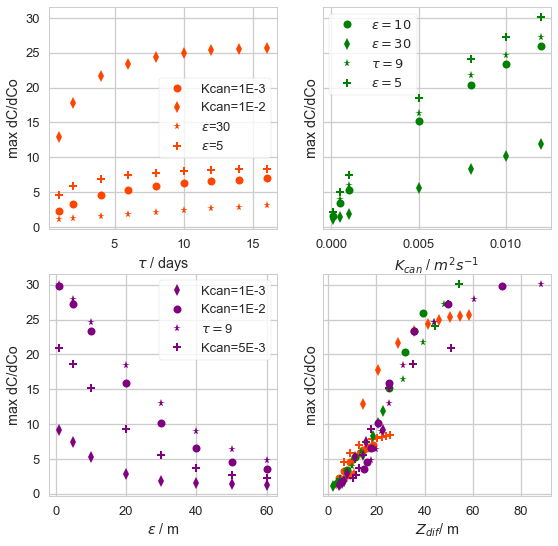

In [40]:
fig, ax = plt.subplots(2,2, figsize=(9,9), sharey=True)

ax[0,0].plot(times, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax[0,0].plot(times, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax[0,0].plot(times, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax[0,0].plot(times, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax[0,1].plot(kcans, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax[0,1].plot(kcans, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax[0,1].plot(kcans, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax[0,1].plot(kcans, dCmax_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax[1,0].plot(epsilons, dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax[1,0].plot(epsilons, dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax[1,0].plot(epsilons, dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax[1,0].plot(epsilons, dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax[1,1].plot(Zdif_tau, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax[1,1].plot(Zdif_tau2, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax[1,1].plot(Zdif_tau3, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax[1,1].plot(Zdif_tau4, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax[1,1].plot(Zdif_kcan, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax[1,1].plot(Zdif_kcan2, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax[1,1].plot(Zdif_kcan3, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax[1,1].plot(Zdif_kcan4, dCmax_kcan4,'P',color='green',markersize=8)

ax[1,1].plot(Zdif_eps, dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax[1,1].plot(Zdif_eps2, dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax[1,1].plot(Zdif_eps3, dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax[1,1].plot(Zdif_eps4, dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax[0,0].set_xlabel(r'$\tau$ / days')
ax[0,0].set_ylabel('max dC/dCo')

ax[0,1].set_xlabel(r'$K_{can}$ / $m^{2}s^{-1}$')
ax[0,1].set_ylabel('max dC/dCo')

ax[1,0].set_xlabel(r'$\epsilon$ / m')
ax[1,0].set_ylabel('max dC/dCo')

ax[1,1].set_xlabel(r'$Z_{dif}$/ m')
ax[1,1].set_ylabel('max dC/dCo')

ax[0,0].legend(loc=0, frameon=True)
ax[0,1].legend(loc=0, frameon=True)
ax[1,0].legend(loc=0, frameon=True)

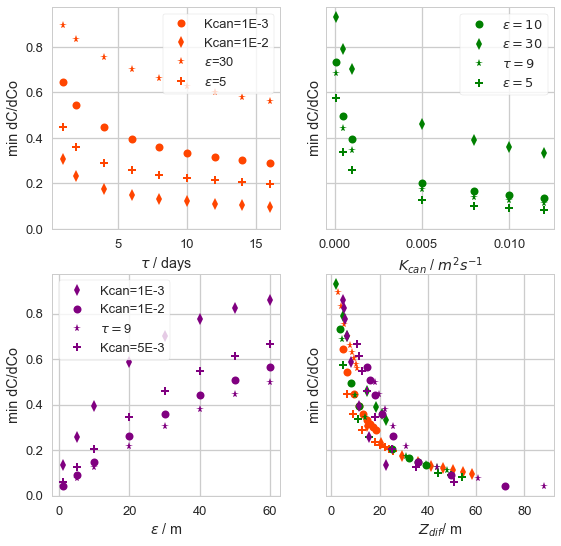

In [41]:
fig, ax = plt.subplots(2,2, figsize=(9,9), sharey=True)

ax[0,0].plot(times, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax[0,0].plot(times, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax[0,0].plot(times, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax[0,0].plot(times, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax[0,1].plot(kcans, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax[0,1].plot(kcans, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax[0,1].plot(kcans, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax[0,1].plot(kcans, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax[1,0].plot(epsilons, dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax[1,0].plot(epsilons, dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax[1,0].plot(epsilons, dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax[1,0].plot(epsilons, dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax[1,1].plot(Zdif_tau, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax[1,1].plot(Zdif_tau2, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax[1,1].plot(Zdif_tau3, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax[1,1].plot(Zdif_tau4, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax[1,1].plot(Zdif_kcan, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax[1,1].plot(Zdif_kcan2, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax[1,1].plot(Zdif_kcan3, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax[1,1].plot(Zdif_kcan4, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax[1,1].plot(Zdif_eps, dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax[1,1].plot(Zdif_eps2, dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax[1,1].plot(Zdif_eps3, dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax[1,1].plot(Zdif_eps4, dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax[0,0].set_xlabel(r'$\tau$ / days')
ax[0,0].set_ylabel('min dC/dCo')

ax[0,1].set_xlabel(r'$K_{can}$ / $m^{2}s^{-1}$')
ax[0,1].set_ylabel('min dC/dCo')

ax[1,0].set_xlabel(r'$\epsilon$ / m')
ax[1,0].set_ylabel('min dC/dCo')

ax[1,1].set_xlabel(r'$Z_{dif}$/ m')
ax[1,1].set_ylabel('min dC/dCo')

ax[0,0].legend(loc=0, frameon=True)
ax[0,1].legend(loc=0, frameon=True)
ax[1,0].legend(loc=0, frameon=True)

### Scale by $Zs = \sqrt{\tau K(above)}$

Text(0,0.5,'max dC/dCo')

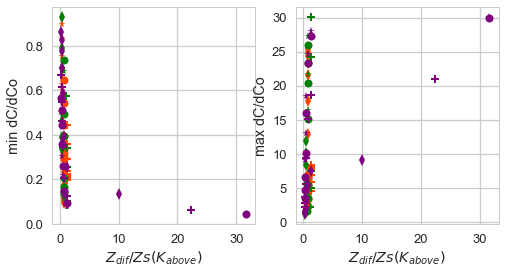

In [59]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,4))

ax0.plot(Zdif_tau/Zs_tau, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_tau2/Zs_tau2, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_tau3/Zs_tau3, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax0.plot(Zdif_tau4/Zs_tau4, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax0.plot(Zdif_kcan/Zs_kcan, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax0.plot(Zdif_kcan2/Zs_kcan2, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax0.plot(Zdif_kcan3/Zs_kcan3, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax0.plot(Zdif_kcan4/Zs_kcan4, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax0.plot(Zdif_eps/Zs_eps, dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_eps2/Zs_eps2, dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_eps3/Zs_eps3, dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax0.plot(Zdif_eps4/Zs_eps4, dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax1.plot(Zdif_tau/Zs_tau, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_tau2/Zs_tau2, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_tau3/Zs_tau3, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax1.plot(Zdif_tau4/Zs_tau4, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax1.plot(Zdif_kcan/Zs_kcan, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax1.plot(Zdif_kcan2/Zs_kcan2, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax1.plot(Zdif_kcan3/Zs_kcan3, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax1.plot(Zdif_kcan4/Zs_kcan4, dCmax_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax1.plot(Zdif_eps/Zs_eps, dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_eps2/Zs_eps2, dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_eps3/Zs_eps3, dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax1.plot(Zdif_eps4/Zs_eps4, dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax0.set_xlabel(r'$Z_{dif}/Zs(K_{above})$')
ax1.set_xlabel(r'$Z_{dif}/Zs(K_{above})$')
ax0.set_ylabel('min dC/dCo')
ax1.set_ylabel('max dC/dCo')


zoomed in

(0, 2)

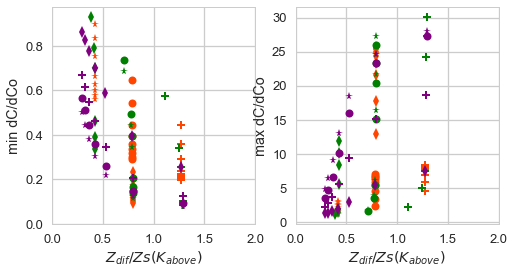

In [62]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,4))

ax0.plot(Zdif_tau/Zs_tau, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_tau2/Zs_tau2, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_tau3/Zs_tau3, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax0.plot(Zdif_tau4/Zs_tau4, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax0.plot(Zdif_kcan/Zs_kcan, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax0.plot(Zdif_kcan2/Zs_kcan2, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax0.plot(Zdif_kcan3/Zs_kcan3, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax0.plot(Zdif_kcan4/Zs_kcan4, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax0.plot(Zdif_eps/Zs_eps, dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_eps2/Zs_eps2, dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_eps3/Zs_eps3, dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax0.plot(Zdif_eps4/Zs_eps4, dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax1.plot(Zdif_tau/Zs_tau, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_tau2/Zs_tau2, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_tau3/Zs_tau3, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax1.plot(Zdif_tau4/Zs_tau4, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax1.plot(Zdif_kcan/Zs_kcan, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax1.plot(Zdif_kcan2/Zs_kcan2, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax1.plot(Zdif_kcan3/Zs_kcan3, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax1.plot(Zdif_kcan4/Zs_kcan4, dCmax_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax1.plot(Zdif_eps/Zs_eps, dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_eps2/Zs_eps2, dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_eps3/Zs_eps3, dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax1.plot(Zdif_eps4/Zs_eps4, dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax0.set_xlabel(r'$Z_{dif}/Zs(K_{above})$')
ax1.set_xlabel(r'$Z_{dif}/Zs(K_{above})$')
ax0.set_ylabel('min dC/dCo')
ax1.set_ylabel('max dC/dCo')
ax0.set_xlim(0,2)
ax1.set_xlim(0,2)

### Scale by $\epsilon$

Text(0,0.5,'max dC/dCo')

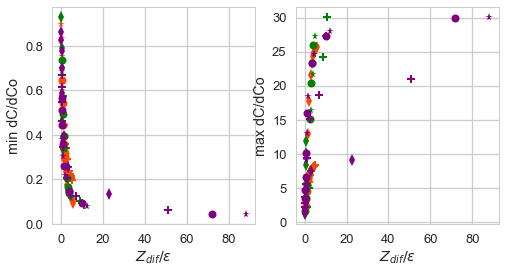

In [60]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,4))

ax0.plot(Zdif_tau/10, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_tau2/10, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_tau3/30, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax0.plot(Zdif_tau4/5, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax0.plot(Zdif_kcan/10, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax0.plot(Zdif_kcan2/30, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax0.plot(Zdif_kcan3/10, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax0.plot(Zdif_kcan4/5, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax0.plot(Zdif_eps/np.array(epsilons), dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_eps2/np.array(epsilons), dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_eps3/np.array(epsilons), dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax0.plot(Zdif_eps4/np.array(epsilons), dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax1.plot(Zdif_tau/10, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_tau2/10, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_tau3/30, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax1.plot(Zdif_tau4/5, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax1.plot(Zdif_kcan/10, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax1.plot(Zdif_kcan2/30, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax1.plot(Zdif_kcan3/10, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax1.plot(Zdif_kcan4/5, dCmax_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax1.plot(Zdif_eps/np.array(epsilons), dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_eps2/np.array(epsilons), dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_eps3/np.array(epsilons), dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax1.plot(Zdif_eps4/np.array(epsilons), dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax0.set_xlabel(r'$Z_{dif}/\epsilon$')
ax1.set_xlabel(r'$Z_{dif}/\epsilon$')
ax0.set_ylabel('min dC/dCo')
ax1.set_ylabel('max dC/dCo')


zoomed in

(0, 2)

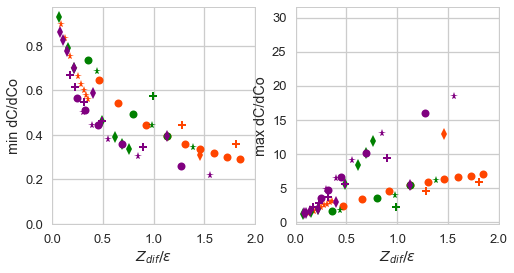

In [64]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,4))

ax0.plot(Zdif_tau/10, dCmin_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_tau2/10, dCmin_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_tau3/30, dCmin_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax0.plot(Zdif_tau4/5, dCmin_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax0.plot(Zdif_kcan/10, dCmin_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax0.plot(Zdif_kcan2/30, dCmin_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax0.plot(Zdif_kcan3/10, dCmin_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax0.plot(Zdif_kcan4/5, dCmin_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax0.plot(Zdif_eps/np.array(epsilons), dCmin_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax0.plot(Zdif_eps2/np.array(epsilons), dCmin_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax0.plot(Zdif_eps3/np.array(epsilons), dCmin_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax0.plot(Zdif_eps4/np.array(epsilons), dCmin_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax1.plot(Zdif_tau/10, dCmax_tau,'o',color='orangered',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_tau2/10, dCmax_tau2,'d',color='orangered',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_tau3/30, dCmax_tau3,'*',color='orangered',markersize=8, label=r'$\epsilon$=30')
ax1.plot(Zdif_tau4/5, dCmax_tau4,'P',color='orangered',markersize=8, label=r'$\epsilon$=5')

ax1.plot(Zdif_kcan/10, dCmax_kcan,'o',color='green',markersize=8, label=r'$\epsilon=10$')
ax1.plot(Zdif_kcan2/30, dCmax_kcan2,'d',color='green',markersize=8, label=r'$\epsilon=30$')
ax1.plot(Zdif_kcan3/10, dCmax_kcan3,'*',color='green',markersize=8, label=r'$\tau=9$')
ax1.plot(Zdif_kcan4/5, dCmax_kcan4,'P',color='green',markersize=8, label=r'$\epsilon=5$')

ax1.plot(Zdif_eps/np.array(epsilons), dCmax_eps,'d',color='purple',markersize=8, label='Kcan=1E-3')
ax1.plot(Zdif_eps2/np.array(epsilons), dCmax_eps2,'o',color='purple',markersize=8, label='Kcan=1E-2')
ax1.plot(Zdif_eps3/np.array(epsilons), dCmax_eps3,'*',color='purple',markersize=8, label=r'$\tau=$9')
ax1.plot(Zdif_eps4/np.array(epsilons), dCmax_eps4,'P',color='purple',markersize=8, label=r'Kcan=5E-3')

ax0.set_xlabel(r'$Z_{dif}/\epsilon$')
ax1.set_xlabel(r'$Z_{dif}/\epsilon$')
ax0.set_ylabel('min dC/dCo')
ax1.set_ylabel('max dC/dCo')
ax0.set_xlim(0,2)
ax1.set_xlim(0,2)